<a href="https://colab.research.google.com/github/Hariharan-Vengadasubramanian/ML-Hackathon/blob/main/Hackathon_3_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (3).csv


In [ ]:
call_data = pd.read_csv("data.csv",parse_dates=[0])

In [ ]:
call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1673 entries, 0 to 1672
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1673 non-null   datetime64[ns]
 1   No_calls_offered  1673 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 26.3 KB


In [ ]:
call_data.tail(7)

,Date,No_calls_offered
1666,2021-07-25,262
1667,2021-07-26,1378
1668,2021-07-27,1347
1669,2021-07-28,1374
1670,2021-07-29,1317
1671,2021-07-30,1185
1672,2021-07-31,345


# Plot Date Vs Calls

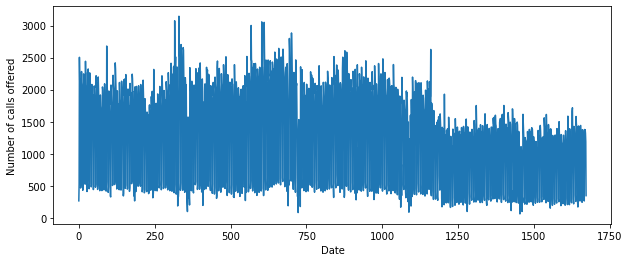

In [ ]:
plt.figure(figsize=(10,4))
plt.xlabel("Date")
plt.ylabel("Number of calls offered")
plt.plot(call_data.No_calls_offered)

# Auto Correlation Map

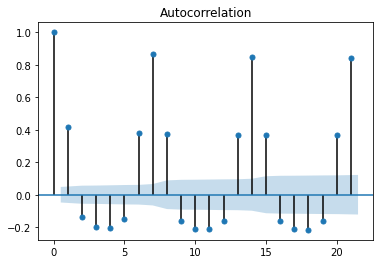

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Autocorrelation
acf_plot = plot_acf(call_data.No_calls_offered,lags=21)

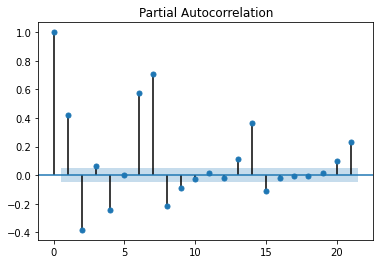

In [ ]:
# Autocorrelation
pacf_plot = plot_pacf(call_data.No_calls_offered,lags=21)

### this gives Order p in Autoregressive model ; Number of significant spikes outside confidence interval is high at 7. We can try AR(7) model ; p=7

# Use Dicky-Fuller test to check if time-series is stationary or not

Null Hypothesis - Time series is not Stationary
Alternate Hypothesis - Time Series is Stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(ts):
  adfuller_result = adfuller(ts,autolag=None)
  adfuller_out = pd.Series(adfuller_result[0:4],
                           index=['Test Statistic',
                                  'p-value',
                                  'Lags Used',
                                  'Number of Observations Used'])
  print(adfuller_out)

In [ ]:
adfuller_test(call_data.No_calls_offered)

Test Statistic                   -2.578515
p-value                           0.097520
Lags Used                        25.000000
Number of Observations Used    1647.000000
dtype: float64


p-value greater than 0.05. So Accept Null Hypothesis, Reject Alternate Hypothesis. 
Time Series is non-Stationary. 

In [ ]:
call_data.index=call_data['Date']

In [ ]:
call_data.No_calls_offered['2021-01-01':'2021-07-31']

Date
2021-01-01      98
2021-02-01     316
2021-03-01     233
2021-04-01    1615
2021-05-01    1470
              ... 
2021-07-27    1347
2021-07-28    1374
2021-07-29    1317
2021-07-30    1185
2021-07-31     345
Name: No_calls_offered, Length: 177, dtype: int64

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

arima = ARIMA(call_data.No_calls_offered['2021-01-01':'2021-07-30'].astype(np.float64),
              order = (7,0,0))

In [ ]:
ar_model = arima.fit()

In [ ]:
ar_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: ARMA
=========================================================================
Model:                ARMA               BIC:                   2596.6581
Dependent Variable:   No_calls_offered   Log-Likelihood:        -1275.1  
Date:                 2022-02-10 19:01   Scale:                 1.0000   
No. Observations:     176                Method:                css-mle  
Df Model:             8                  Sample:                0        
Df Residuals:         168                                       6        
Converged:            1.0000             S.D. of innovations:   336.630  
No. Iterations:       31.0000            HQIC:                  2579.697 
AIC:                  2568.1238                                          
-------------------------------------------------------------------------
                        Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-------------------------------------------------------------------------
const                  964.1754  16.5040 58.4207 0.0000 931.8282 996.5226
ar.L1.No_calls_offered   0.2656   0.0754  3.5220 0.0006   0.1178   0.4134
ar.L2.No_calls_offered  -0.3503   0.0779 -4.4984 0.0000  -0.5029  -0.1977
ar.L3.No_calls_offered  -0.1061   0.0797 -1.3323 0.1846  -0.2623   0.0500
ar.L4.No_calls_offered  -0.2148   0.0787 -2.7283 0.0070  -0.3692  -0.0605
ar.L5.No_calls_offered  -0.3276   0.0806 -4.0635 0.0001  -0.4857  -0.1696
ar.L6.No_calls_offered   0.0335   0.0796  0.4206 0.6746  -0.1226   0.1896
ar.L7.No_calls_offered   0.1506   0.0765  1.9695 0.0505   0.0007   0.3004
------------------------------------------------------------------------------------
                  Real             Imaginary            Modulus            Frequency
------------------------------------------------------------------------------------
AR.1             0.7097              -0.7734             1.0497              -0.1318
AR.2             0.7097               0.7734             1.0497               0.1318
AR.3            -0.2621              -1.1192             1.1495              -0.2866
AR.4            -0.2621               1.1192             1.1495               0.2866
AR.5             1.8222              -0.0000             1.8222              -0.0000
AR.6            -1.4699              -0.5849             1.5820              -0.4397
AR.7            -1.4699               0.5849             1.5820               0.4397
=========================================================================

"""

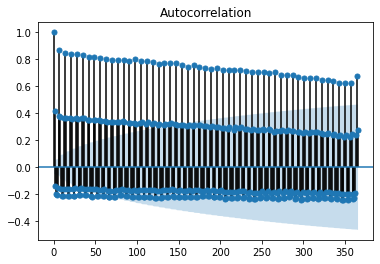

In [ ]:
### Now determine order q

# Autocorrelation
acf_plot = plot_acf(call_data.No_calls_offered,lags=365)

### Below ACF plot shows it take long for data to converge. This indicates data is non-stationary evident from Dicky Fueller test. So assume q=5. 
### Larger q leads to Overfitting

In [ ]:
arma = ARIMA(call_data.No_calls_offered['2021-01-01':'2021-07-30'].astype(np.float64),
              order = (7,0,3))

In [ ]:
arma_model = arma.fit()

In [ ]:
arma_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: ARMA
=========================================================================
Model:                ARMA               BIC:                   2610.7078
Dependent Variable:   No_calls_offered   Log-Likelihood:        -1274.3  
Date:                 2022-02-10 19:01   Scale:                 1.0000   
No. Observations:     176                Method:                css-mle  
Df Model:             11                 Sample:                0        
Df Residuals:         165                                       6        
Converged:            1.0000             S.D. of innovations:   335.162  
No. Iterations:       64.0000            HQIC:                  2588.093 
AIC:                  2572.6620                                          
-------------------------------------------------------------------------
                        Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-------------------------------------------------------------------------
const                  964.3021  16.3205 59.0854 0.0000 932.3145 996.2897
ar.L1.No_calls_offered   0.0084   0.3900  0.0216 0.9828  -0.7560   0.7728
ar.L2.No_calls_offered  -0.0838   0.2848 -0.2943 0.7689  -0.6421   0.4744
ar.L3.No_calls_offered  -0.1327   0.2522 -0.5264 0.5993  -0.6270   0.3615
ar.L4.No_calls_offered  -0.2185   0.1674 -1.3051 0.1937  -0.5467   0.1096
ar.L5.No_calls_offered  -0.3036   0.1910 -1.5897 0.1138  -0.6779   0.0707
ar.L6.No_calls_offered  -0.0120   0.2176 -0.0549 0.9562  -0.4384   0.4145
ar.L7.No_calls_offered   0.2942   0.1607  1.8312 0.0689  -0.0207   0.6092
ma.L1.No_calls_offered   0.2760   0.3978  0.6940 0.4887  -0.5036   1.0556
ma.L2.No_calls_offered  -0.1960   0.3401 -0.5764 0.5651  -0.8626   0.4705
ma.L3.No_calls_offered  -0.1518   0.2217 -0.6846 0.4946  -0.5864   0.2828
------------------------------------------------------------------------------------
                  Real             Imaginary            Modulus            Frequency
------------------------------------------------------------------------------------
AR.1            -1.1507              -0.4952             1.2527              -0.4353
AR.2            -1.1507               0.4952             1.2527               0.4353
AR.3            -0.3017              -1.0918             1.1327              -0.2929
AR.4            -0.3017               1.0918             1.1327               0.2929
AR.5             0.7165              -0.7763             1.0564              -0.1314
AR.6             0.7165               0.7763             1.0564               0.1314
AR.7             1.5125              -0.0000             1.5125              -0.0000
MA.1             1.7876              -0.0000             1.7876              -0.0000
MA.2            -1.5395              -1.1469             1.9198              -0.3981
MA.3            -1.5395               1.1469             1.9198               0.3981
=========================================================================

"""

In [ ]:
### Now try Arima model with d=1
arima = ARIMA(call_data.No_calls_offered['2021-01-01':'2021-07-30'].astype(np.float64),
              order = (7,1,3))

In [ ]:
arima_model = arima.fit()

In [ ]:
arima_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: ARIMA
=========================================================================
Model:                ARIMA               BIC:                  2593.6553
Dependent Variable:   D.No_calls_offered  Log-Likelihood:       -1265.8  
Date:                 2022-02-10 19:02    Scale:                1.0000   
No. Observations:     175                 Method:               css-mle  
Df Model:             11                  Sample:               1        
Df Residuals:         164                                       6        
Converged:            1.0000              S.D. of innovations:  322.562  
No. Iterations:       149.0000            HQIC:                 2571.083 
AIC:                  2555.6779                                          
-------------------------------------------------------------------------
                          Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------------
const                     0.3644   0.2662   1.3686 0.1730 -0.1574  0.8862
ar.L1.D.No_calls_offered -1.4755   0.0744 -19.8294 0.0000 -1.6214 -1.3297
ar.L2.D.No_calls_offered -0.8891   0.1163  -7.6476 0.0000 -1.1169 -0.6612
ar.L3.D.No_calls_offered -0.6589   0.1160  -5.6788 0.0000 -0.8863 -0.4315
ar.L4.D.No_calls_offered -0.9227   0.1069  -8.6278 0.0000 -1.1323 -0.7131
ar.L5.D.No_calls_offered -0.9576   0.1172  -8.1741 0.0000 -1.1872 -0.7280
ar.L6.D.No_calls_offered -0.9103   0.1165  -7.8131 0.0000 -1.1387 -0.6820
ar.L7.D.No_calls_offered -0.3112   0.0736  -4.2302 0.0000 -0.4555 -0.1670
ma.L1.D.No_calls_offered  0.8249      nan      nan    nan     nan     nan
ma.L2.D.No_calls_offered -0.8249   0.0313 -26.3523 0.0000 -0.8862 -0.7635
ma.L3.D.No_calls_offered -1.0000      nan      nan    nan     nan     nan
------------------------------------------------------------------------------------
                  Real             Imaginary            Modulus            Frequency
------------------------------------------------------------------------------------
AR.1             0.7354              -0.7639             1.0604              -0.1280
AR.2             0.7354               0.7639             1.0604               0.1280
AR.3            -0.3210              -1.1759             1.2189              -0.2924
AR.4            -0.3210               1.1759             1.2189               0.2924
AR.5            -0.9169              -0.4013             1.0008              -0.4343
AR.6            -0.9169               0.4013             1.0008               0.4343
AR.7            -1.9199              -0.0000             1.9199              -0.5000
MA.1             1.0000              -0.0000             1.0000              -0.0000
MA.2            -0.9124              -0.4092             1.0000              -0.4329
MA.3            -0.9124               0.4092             1.0000               0.4329
=========================================================================

"""

AIC values:
AR model -    2568.1238

ARMA model  -  2572.6620

ARIMA model - 2555.6779 

ARMA model got highest AIC score. This would be better fit for forecast.

In [ ]:
X = call_data.values
X

array([[Timestamp('2017-01-01 00:00:00'), 264],
       [Timestamp('2017-02-01 00:00:00'), 528],
       [Timestamp('2017-03-01 00:00:00'), 2505],
       ...,
       [Timestamp('2021-07-29 00:00:00'), 1317],
       [Timestamp('2021-07-30 00:00:00'), 1185],
       [Timestamp('2021-07-31 00:00:00'), 345]], dtype=object)

In [ ]:
size = int(len(X) - 7)
size

1666

In [ ]:
train,test = X[0:size],X[size:len(X)]

In [ ]:
history = [X for X in train]
predictions=list()

In [ ]:
predictions=list()
actual=list()

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
for t in range(len(test)):
  #model = ARIMA(history[0],order = (7,1,3))
  model = ARIMA(call_data.No_calls_offered[0:size].astype(np.float64),
              order = (7,1,3))
  model_fit = model.fit()
  output = model_fit.forecast()
  ypred = int(output[0])
  predictions.append(ypred)
  ytest = test[t][1]
  actual.append(ytest)
  size=size+1
  #history.append(ytest)
  print(test[t][0])
  print('predicted=%f' %ypred) 
  print('actual=%f' %ytest)
  #rmse = sqrt(mean_squared_error(ytest,ypred))


2021-07-25 00:00:00
predicted=330.000000
actual=262.000000
2021-07-26 00:00:00
predicted=1269.000000
actual=1378.000000
2021-07-27 00:00:00
predicted=1411.000000
actual=1347.000000
2021-07-28 00:00:00
predicted=1234.000000
actual=1374.000000
2021-07-29 00:00:00
predicted=1283.000000
actual=1317.000000
2021-07-30 00:00:00
predicted=1125.000000
actual=1185.000000
2021-07-31 00:00:00
predicted=394.000000
actual=345.000000


In [ ]:
predictions

[330, 1269, 1411, 1234, 1283, 1125, 394]

In [ ]:
actual

[262, 1378, 1347, 1374, 1317, 1185, 345]

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(actual,predictions))

In [ ]:
print('RMSE %.2f' %rmse)

RMSE 82.25


In [ ]:
## define get_mape
import numpy as np
def get_mape(act,predicted):
  y_true,y_pred=np.array(act),np.array(predicted)
  return np.round(np.mean(np.abs((act-predicted)/act))*100,2 )

In [ ]:
### convert list to series
mape_predict = pd.Series(predictions)
mape_predict

0     330
1    1269
2    1411
3    1234
4    1283
5    1125
6     394
dtype: int64

In [ ]:
mape_actual = pd.Series(actual)
mape_actual

0     262
1    1378
2    1347
3    1374
4    1317
5    1185
6     345
dtype: int64

In [ ]:
##### Mean Absolute Percentage Error
print('Mape %.2f' % get_mape(mape_actual,mape_predict))

Mape 10.09
